In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def fc(z):
    return 1j*z


In [35]:
def ComplexEuler2():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+h_*k1)
    
    f += 0.5*h_*(k1+k2)

def RK3():
    global theta3
    global f3
    global h_3

    theta3 += h_3

    k1 = fc(f3)
    k2 = fc(f3 + 0.5*h_3*k1)
    k3 = fc(f3 - h_3*k1 + 2*h_3*k2)

    f3 += (h_3/6)*(k1 + 4*k2 + k3)

def RK4():
    global theta4
    global f4
    global h_4

    theta4 += h_4

    k1 = fc(f4)
    k2 = fc(f4 + 0.5*k1*h_4)
    k3 = fc(f4 + 0.5*k2*h_4)
    k4 = fc(f4 + k3*h_4)

    f4 += (h_4/6) * (k1 + 2*k2 + 2*k3 + k4)

In [36]:
theta = 0.
theta3 = 0.
theta4 = 0.

N = 20
Vueltas = 1

h_ = Vueltas * 2*np.pi/N
h_3 = Vueltas * 2*np.pi/N
h_4 = Vueltas * 2*np.pi/N

f = 1
f3 = 1
f4 = 1

Solucion = np.array([theta,f])
Solucion3 = np.array([theta3,f3])
Solucion4 = np.array([theta4,f4])


for i in range(N):
    ComplexEuler2()
    RK3()
    RK4()
    Solucion = np.vstack([Solucion, np.array([theta,f])])
    Solucion3 = np.vstack([Solucion3, np.array([theta3,f3])])
    Solucion4 = np.vstack([Solucion4, np.array([theta4,f4])])



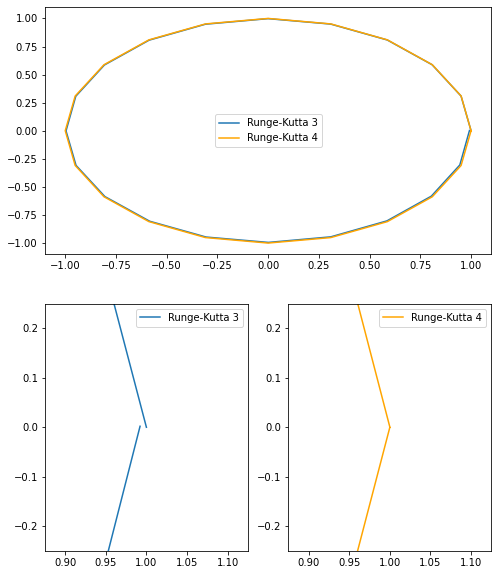

In [46]:
fig = plt.figure(figsize=(8,10))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

Re = np.real(Solucion[:,1])
Im = np.imag(Solucion[:,1])

Re3 = np.real(Solucion3[:,1])
Im3 = np.imag(Solucion3[:,1])

Re4 = np.real(Solucion4[:,1])
Im4 = np.imag(Solucion4[:,1])


#plt.plot(Re,Im)
ax1.plot(Re3,Im3, label='Runge-Kutta 3')
ax1.plot(Re4,Im4, label='Runge-Kutta 4', color='orange')
ax1.legend()

ax2.plot(Re3, Im3, label='Runge-Kutta 3')
ax2.set_xlim(0.875, 1.125)
ax2.set_ylim(-0.25, 0.25)
ax2.legend()

ax3.plot(Re4,Im4, label='Runge-Kutta 4', color='orange')
ax3.set_xlim(0.875, 1.125)
ax3.set_ylim(-0.25, 0.25)
ax3.legend()